Author: Geoff Boeing <br />
Web: http://geoffboeing.com/2015/03/chaos-theory-logistic-map/  <br />
Date: 2015-03-25 <br />
Description: This notebook implements a logistic map and plots its results, bifurcation diagrams, and poincare plots

In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import IPython.display as display

## The first 3 cells just define functions for our logistic map and bifurcation plots

In [2]:
def logistic_model(generations=20, 
                   growth_rate_min=0.5, 
                   growth_rate_max=4.0, 
                   growth_rate_steps=7, 
                   pop_initial=0.5):
    """
    returns a pandas dataframe with columns for each growth rate, row labels for each time step,
    and population values computed by the logistic model: pop[t + 1] = pop[t] * rate * (1 - pop[t])
    
    pop_initial = starting population when you run the model, between 0 and 1
    generations = number of iterations to run the model
    growth_rate_min = the first growth rate for the model, between 0 and 4
    growth_rate_max = the last growth rate for the model, between 0 and 4
    growth_rate_steps = how many growth rates between min and max (inclusive) to run the model on
    """
    
    # convert the growth rate min and max values to floats so we can divide them
    growth_rate_min = float(growth_rate_min)
    growth_rate_max = float(growth_rate_max)
    
    # calculate the size of each step
    growth_rate_step = (growth_rate_max - growth_rate_min) / growth_rate_steps
    
    # we want to go up to but not including the growth_rate_max
    growth_rate_max -= 0.0000000001
    
    # get a range of values to represent each growth rate we're modeling - these will be our columns
    growth_rates = np.arange(growth_rate_min, growth_rate_max, growth_rate_step)
    
    # create a new dataframe with one column for each growth rate and one row for each timestep (aka generation)
    pops = pd.DataFrame(columns=growth_rates, index=range(generations))
    pops.iloc[0] = pop_initial
    
    # for each column (aka growth rate) in the dataframe
    for rate in pops.columns:
        
        # pop is a copy of the pandas series of this column in the dataframe
        pop = pops[rate]
        
        # for each timestep in the number of iterations to run
        for t in range(generations - 1):
            
            # update the dataframe values by running this timestep of the logistic model
            pop[t + 1] = pop[t] * rate * (1 - pop[t])
    
    return pops

In [3]:
def get_bifurcation_points(pops, discard_gens):
    """
    convert a dataframe of values from the logistic model into a set of xy points that
    you can plot as a bifurcation diagram
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    """
    
    # create a new dataframe to contain our xy points
    points = pd.DataFrame(columns=['x', 'y'])
    
    # drop the initial rows of the populations data, if specified by the argument
    if discard_gens > 0:
        discard_gens = np.arange(0, discard_gens)
        pops = pops.drop(labels=pops.index[discard_gens])
    
    # for each column in the logistic populations dataframe
    for rate in pops.columns:
        # append the growth rate as the x column and all the population values as the y column
        points = points.append(pd.DataFrame({'x':rate, 'y':pops[rate]}))
    
    # reset the index and drop the old index before returning the xy point data
    points = points.reset_index().drop(labels='index', axis=1)
    return points

In [4]:
def bifurcation_plot(pops, discard_gens=1, xmin=0, xmax=4, ymin=0, ymax=1, height=6, width=10):
    """
    plot the results of the logistic model as a bifurcation diagram
    
    pops = population data output from the model
    discard_gens = number of rows to discard before keeping points to plot
    xmin = minimum value on the x axis
    xmax = maximum value on the x axis
    ymin = minimum value on the y axis
    ymax = maximum value on the y axis
    height = the height of the figure to plot, in inches
    width = the width of the figure to plot, in inches
    """
    
    # first get the xy points to plot
    points = get_bifurcation_points(pops, discard_gens)
    
    # create a new matplotlib figure and axis and set its size
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    
    # plot the xy data
    bifurcation_scatter = ax.scatter(points['x'], points['y'], c='b', edgecolor='', alpha=1, s=1)
    
    # set x and y limits, title, and x and y labels
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title('Bifurcation Diagram')
    ax.set_xlabel('Growth Rate')
    ax.set_ylabel('Population')
    
    plt.show()

##First, let's see the population values the logistic map produces for a range of growth rate parameters

In [5]:
# run the logistic model with its default arguments and view the data output
pops = logistic_model()
pops

,0.5,1.0,1.5,2.0,2.5,3.0,3.5
0,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,0.125,0.25,0.375,0.5,0.625,0.75,0.875
2,0.0546875,0.1875,0.3515625,0.5,0.5859375,0.5625,0.3828125
3,0.02584839,0.1523438,0.3419495,0.5,0.6065369,0.7382812,0.8269348
4,0.01259012,0.1291351,0.33753,0.5,0.5966247,0.5796661,0.5008977
5,0.006215807,0.1124592,0.3354053,0.5,0.6016591,0.7309599,0.8749972
6,0.003088585,0.09981217,0.3343629,0.5,0.5991635,0.5899725,0.3828199
7,0.001539523,0.0898497,0.3338465,0.5,0.6004165,0.7257148,0.8269409
8,0.0007685764,0.08177673,0.3335895,0.5,0.5997913,0.5971585,0.5008838
9,0.0003839928,0.0750893,0.3334613,0.5,0.6001042,0.7216807,0.8749973


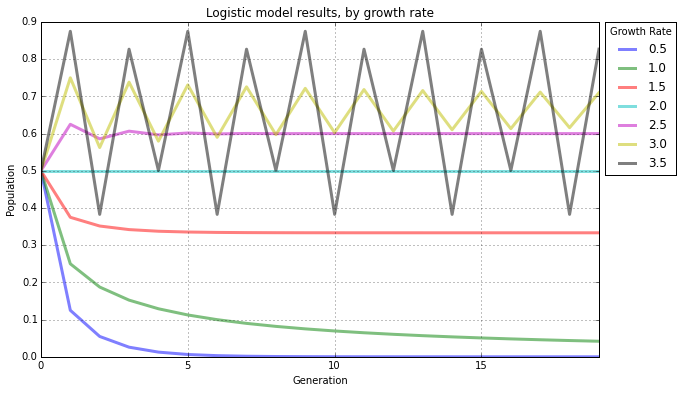

In [6]:
# plot the results of the logistic map run for these 7 different growth rates
pops = logistic_model()
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.5)
ax.set_title('Logistic model results, by growth rate')
ax.set_xlabel('Generation')
ax.set_ylabel('Population')
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.525))
plt.show()

## Now let's visualize the system attractors for a large range of growth rate parameters, using bifurcation diagrams

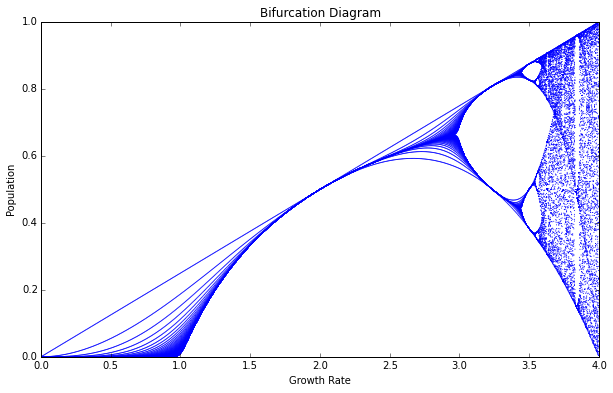

In [7]:
# run the model for 100 generations across 1000 growth rate steps from 0 to 4 then plot the bifurcation diagram
generations = 100
growth_rate_min = 0
growth_rate_max = 4
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops)

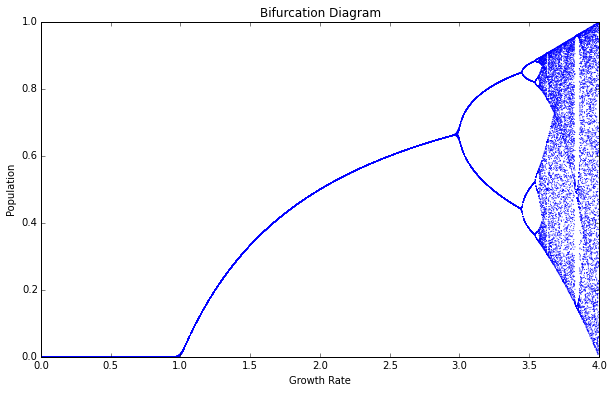

In [8]:
# plot the bifurcation diagram for 200 generations, but this time throw out the first 100 rows
# 200-100=100, so we still have 100 generations in the plot, just like in the previous cell
# this will show us only the attractors (aka, the values that each growth rate settles on over time)
generations = 200
discard_gens = 100
growth_rate_min = 0
growth_rate_max = 4
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops, discard_gens)

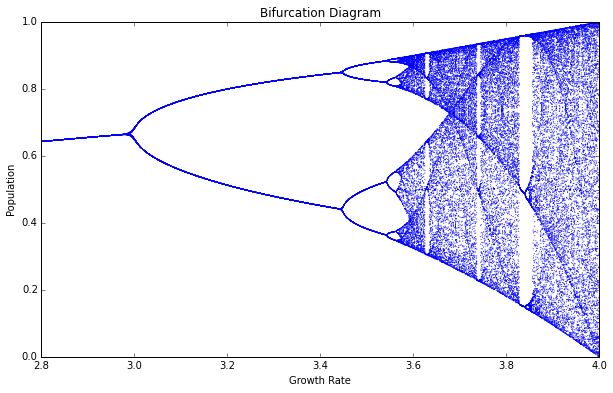

In [9]:
# run the model for 300 generations across 1,000 growth rate steps from 2.8 to 4, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
generations = 300
discard_gens = 200
growth_rate_min = 2.8
growth_rate_max = 4
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops, discard_gens, growth_rate_min, growth_rate_max)

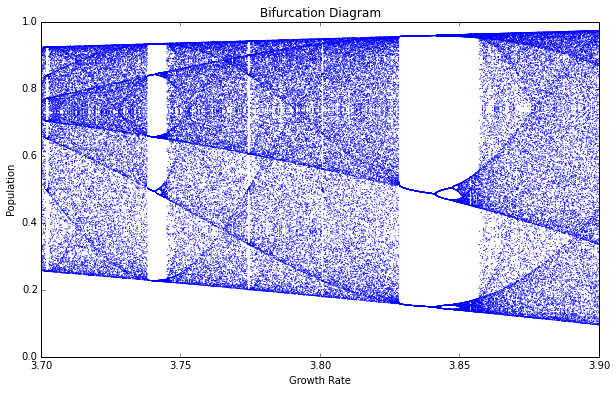

In [10]:
# run the model for 200 generations across 1,000 growth rate steps from 3.7 to 3.9, and plot the bifurcation diagram
# this plot is a zoomed-in look at the first plot and shows more detail in the chaotic regimes
generations = 200
discard_gens = 100
growth_rate_min = 3.7
growth_rate_max = 3.9
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops, discard_gens, growth_rate_min, growth_rate_max)

## In the chaotic regime (r=3.6 to 4=4.0), the system has a strange attractor with fractal structure

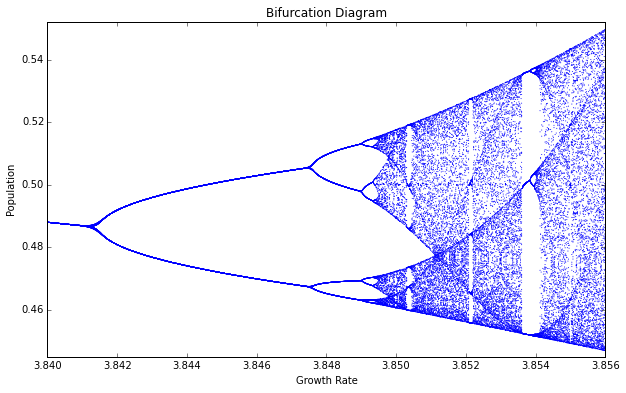

In [11]:
# run the model for 500 generations across 1,000 growth rate steps from 3.84 to 3.856, and plot the bifurcation diagram
# throw out the first 300 generations, so we end up with 200 generations in the plot
# this plot is a zoomed-in look at the first plot and shows the same structure we saw at the macro-level
generations = 500
discard_gens = 300
growth_rate_min = 3.84
growth_rate_max = 3.856
growth_rate_steps = 1000
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
bifurcation_plot(pops, discard_gens, growth_rate_min, growth_rate_max, 0.445, 0.552)

## Now let's visualize the system's sensitive dependence on initial conditions

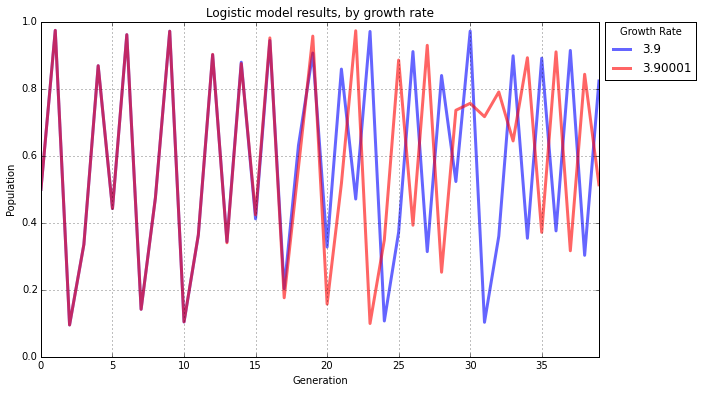

In [12]:
# plot the numeric output of the logistic model for growth rates of 3.9 and 3.90001
# this demonstrates sensitive dependence on the parameter
generations = 40
growth_rate_min = 3.9
growth_rate_max = growth_rate_min + 0.00002
growth_rate_steps = 2
pops = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps)
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['b-','r-'])
ax.set_title('Logistic model results, by growth rate')
ax.set_xlabel('Generation')
ax.set_ylabel('Population')
ax.legend(title='Growth Rate', loc=3, bbox_to_anchor=(1, 0.81))
plt.show()

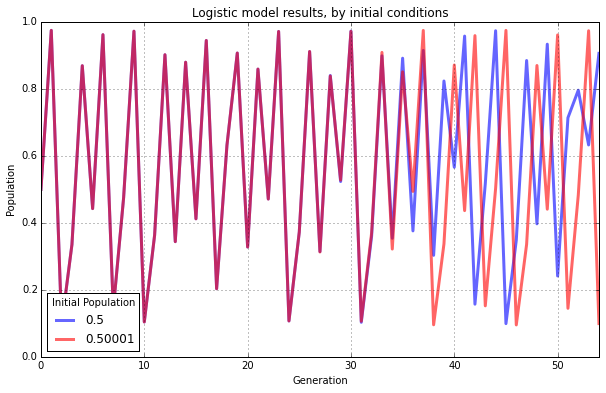

In [13]:
# plot the numeric output of the logistic model at growth rate 3.9 for 2 similar starting population values
# this demonstrates sensitive dependence on initial conditions, as they diverge through chaos
generations = 55
growth_rate_min = 3.9
growth_rate_max = 4.0
growth_rate_steps = 1
pop_initial1 = 0.5
pop_initial2 = 0.50001
pops1 = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps, pop_initial1)
pops2 = logistic_model(generations, growth_rate_min, growth_rate_max, growth_rate_steps, pop_initial2)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = [str(pop_initial1), str(pop_initial2)]
ax = pops.plot(kind='line', figsize=[10, 6], linewidth='3', alpha=0.6, style=['b-','r-'])
ax.set_title('Logistic model results, by initial conditions')
ax.set_xlabel('Generation')
ax.set_ylabel('Population')
ax.legend(title='Initial Population', loc=3, frameon=True, framealpha=1)
plt.show()

## In part 2, I look at Poincaré Plots (aka, return maps) that let us visualize our strange attractors and disambiguate chaos from random noise:
http://nbviewer.ipython.org/github/gboeing/chaos-models/blob/master/chaos-logistic-poincare-plots.ipynb

In [14]:
# here's an example of the Poincaré Plots that I create in chaos-logistic-poincare-plots.ipynb
display.Image(url='images/poincare-plot-3d-chaos.png')

## For more information about chaos theory, the logistic map, bifurcation plots, Poincaré plots, and strange attractors, check out my write-up:
http://geoffboeing.com/2015/03/chaos-theory-logistic-map/